[Theory cs229 Andrew Ng](http://cs229.stanford.edu/notes/cs229-notes3.pdf)

[Лекции по методу опорных векторов К. В. Воронцов](http://www.ccas.ru/voron/download/SVM.pdf)

[ODS SVM tutorial](http://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_russian/tutorials/svm_tutorial_pavelvpster.ipynb?flush_cache=true)

[!!! CVXOPT User’s Guide](http://cvxopt.org/userguide/coneprog.html#algorithm-parameters)

[CVXOPT Documentation Release 1.2](https://media.readthedocs.org/pdf/cvxopt/dev/cvxopt.pdf)

[Quadratic programming CVXOPT Example](http://cvxopt.org/examples/tutorial/qp.html)

[Quadratic Programming with Python and CVXOPT](https://courses.csail.mit.edu/6.867/wiki/images/a/a7/Qp-cvxopt.pdf)

[Some implementation](https://pythonprogramming.net/soft-margin-kernel-cvxopt-svm-machine-learning-tutorial/)

[Some implementation 2](http://tullo.ch/articles/svm-py/)

[Sklearn kernel functions](http://scikit-learn.org/stable/modules/svm.html#kernel-functions)

$$\max_{\alpha}{W(\alpha) = \sum_{i=1}^{m}{\alpha_{i}} - \frac{1}{2}\sum_{i,j=1}^{m}{y^{(i)} y^{(j)} \alpha_{i} \alpha_{j} \langle x^{(i)}, x^{(j)} \rangle}}$$

$$
\begin{cases}
  0 \leq \alpha_{i} \leq C& \text{for }1 \le i \le m\\    
   \sum_{i=1}^{m}{\alpha_{i} y^{(i)}} = 0
\end{cases}
$$

In [1]:
# !pip install cvxopt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [39]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [5]:
data = pd.read_csv('../data/chips.txt')
data.head()

,x,y,cls
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [6]:
data['cls'].unique()

array([1, 0])

In [7]:
X, y = data[['x', 'y']].values, data['cls'].values

In [8]:
y[y == 0] = -1

In [9]:
# Маски для срезов данных по двум классам
reds = (y == -1)
blues = (y == 1)

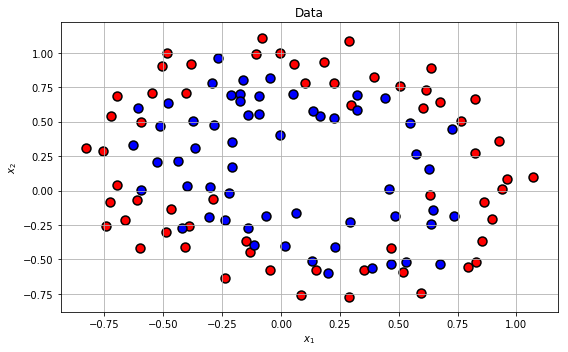

In [10]:
# Plots
plt.figure(figsize=(8, 5))
# plt.subplot(1, 2, 1)
plt.title('Data')
plt.scatter(X[reds, 0], X[reds, 1], c='red', s=80, cmap='autumn', edgecolors='black', linewidth=1.5)
plt.scatter(X[blues, 0], X[blues, 1], c='blue', s=80, cmap='autumn', edgecolors='black', linewidth=1.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()

plt.tight_layout();

In [11]:
from SvmClassifier_dev import SvmClassifier

По [Andrew Ng](http://cs229.stanford.edu/notes/cs229-notes3.pdf)

Сколярное произведение можно заменить на ядерную функцию

$$\max_{\alpha}{W(\alpha) = \sum_{i=1}^{m}{\alpha_{i}} - \frac{1}{2}\sum_{i,j=1}^{m}{y^{(i)} y^{(j)} \alpha_{i} \alpha_{j} K(x^{(i)}, x^{(j)})}}$$

$$
\begin{cases}
  0 \leq \alpha_{i} \leq C& \text{for }1 \le i \le m\\    
   \sum_{i=1}^{m}{\alpha_{i} y^{(i)}} = 0
\end{cases}
$$

Перепишем задачу максимизации в задачу минимизации

$$\min_{\alpha}{W(\alpha) = \frac{1}{2}\sum_{i,j=1}^{m}{y^{(i)} y^{(j)} \alpha_{i} \alpha_{j} K(x^{(i)}, x^{(j)})} - \sum_{i=1}^{m}{\alpha_{i}}}$$

$$
\begin{cases}
    \alpha_{i} \leq 0& i = 1, \dots, m \\
    -\alpha_{i} \leq C& i = 1, \dots, m \\
    \sum_{i=1}^{m}{y^{(i)} \alpha_{i}} = 0
\end{cases}
$$

После нахождения $\vec{\alpha}$ вычислим веса модели

$$ w = \sum_{i=1}^{m}{\alpha_{i} y^{(i)} x^{(i)}} $$

$$$$

In [12]:
# cvxopt_args = {'show_progress':True, 'maxiters':150}
svm = SvmClassifier(kernel='polynomial', C=1)

In [13]:
svm.fit(X, y)

In [14]:
svm.qp_solution.keys()

dict_keys(['x', 'y', 's', 'z', 'status', 'gap', 'relative gap', 'primal objective', 'dual objective', 'primal infeasibility', 'dual infeasibility', 'primal slack', 'dual slack', 'iterations'])

In [15]:
svm.qp_solution['iterations']

8

In [16]:
y_pred = svm.predict(X)
accuracy_score(y, y_pred)
precision_score(y, y_pred)
recall_score(y, y_pred)
f1_score(y, y_pred) # TODO: bug if C=None

0.8135593220338984

0.7903225806451613

0.8448275862068966

0.8166666666666667

In [40]:
confusion_matrix(y, y_pred)

array([[47, 13],
       [ 9, 49]])

# Cross-Validation

In [32]:
svm_grid = {}

In [33]:
kf = KFold(n_splits=5, shuffle=True, random_state=112358)

In [34]:
svm_cls = SvmClassifier(kernel='polynomial', C=1)

In [35]:
svm_cv = GridSearchCV(svm_cls, param_grid=svm_grid, scoring='f1', cv=kf)

In [36]:
%%time
svm_cv.fit(X, y)

CPU times: user 308 ms, sys: 12.7 ms, total: 321 ms
Wall time: 310 ms


GridSearchCV(cv=KFold(n_splits=5, random_state=112358, shuffle=True),
       error_score='raise',
       estimator=SvmClassifier(C=1, kernel='polynomial', threshold=1e-05),
       fit_params=None, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [37]:
svm_cv.best_score_
svm_cv.best_estimator_

0.7650307072251765

SvmClassifier(C=1, kernel='polynomial', threshold=1e-05)

# Visualization

In [19]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [20]:
def plot_contours(ax, classifier, xx, yy, **params):
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [32]:
def compare_and_plot(X, y):

    classifiers = [
        SvmClassifier(kernel='linear', C=1),
        SvmClassifier(kernel='gaussian', C=1),
        SvmClassifier(kernel='polynomial', C=1)#,
#         SvmClassifier(kernel='sigmoid', C=1)
    ]
    
    classifier_names = [
        'SVM (Linear)',
        'SVM (Gaussian)',
        'SVM (Polynomial)'#,
#         'SVM (Sigmoid Kernel)'
    ]
    
    for classifier in classifiers:
        classifier.fit(X, y)
    
    color = ['red' if y_i == -1 else 'blue' if y_i == 1 else 'black' for y_i in y]
    
    xx, yy = make_meshgrid(X[:, 0], X[:, 1])
    
    fig, sub = plt.subplots(2, 2, figsize=(12, 12))
    
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    
    for name, classifier, ax in zip(classifier_names, classifiers, sub.flatten()):
        
        plot_contours(ax, classifier, xx, yy, cmap='summer', alpha=0.25)
        
        ax.scatter(X[:, 0], X[:, 1], c=color, s=20, edgecolor='k')
        
        predictions = classifier.predict(X)
        acc = f1_score(y, predictions) # accuracy_score
        
        ax.set_title('{}. F1_score={}'.format(name, acc))

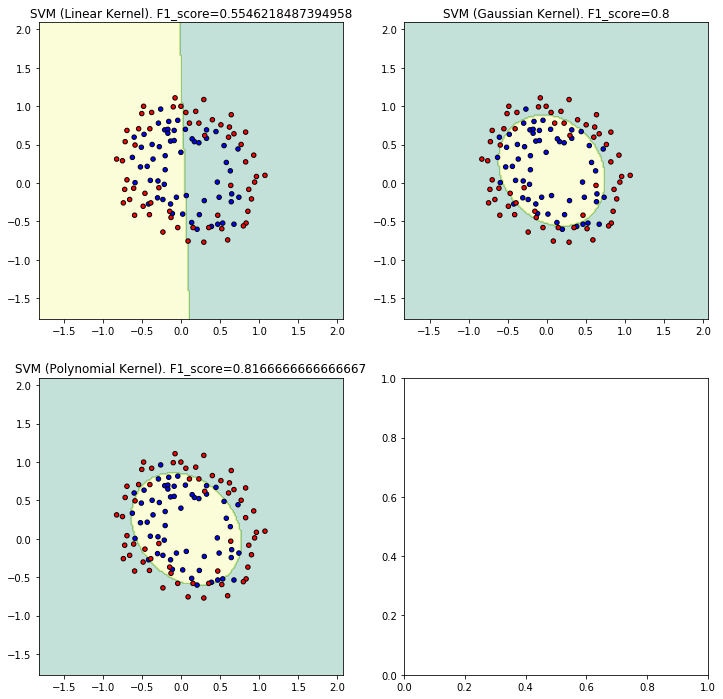

In [33]:
compare_and_plot(X, y)

# Bug

In [112]:
from cvxopt import matrix, solvers
from kernels import linear_kernel, gaussian_kernel, \
                    polynomial_kernel, sigmoid_kernel

In [ ]:
svm = SvmClassifier(kernel='sigmoid')

In [ ]:
svm.fit(X, y)

In [113]:
sigmoid_kernel(X[0], X[1])

0.9999970313772827

In [117]:
svm.K

array([[1.        , 0.99999703, 0.99999999, ..., 1.        , 0.99999982,
        0.99999949],
       [0.99999703, 0.99866499, 0.99983569, ..., 0.99995815, 0.9994507 ,
        0.99937217],
       [0.99999999, 0.99983569, 1.        , ..., 0.9999933 , 1.        ,
        0.99999959],
       ...,
       [1.        , 0.99995815, 0.9999933 , ..., 0.99999987, 0.99995754,
        0.99998475],
       [0.99999982, 0.9994507 , 1.        , ..., 0.99995754, 1.        ,
        0.99999744],
       [0.99999949, 0.99937217, 0.99999959, ..., 0.99998475, 0.99999744,
        0.99987063]])

In [115]:
n_samples = len(y)

Q = matrix(svm.K * np.outer(y, y))
p = matrix(-np.ones(n_samples))
A = matrix(y, (1, n_samples), tc='d')
b = matrix(0.0)

# Unequalities
if svm.C is None:
    G = matrix(-np.eye(n_samples))
    h = matrix(np.zeros(n_samples))
else:
    G = matrix(np.r_[-np.eye(n_samples),
                     np.eye(n_samples)])
    h = matrix(np.r_[np.zeros(n_samples),
                     np.full(n_samples, self.C, dtype='float32')])

In [116]:
Q
p
A
b
G
h

<100x100 matrix, tc='d'>

<100x1 matrix, tc='d'>

<1x100 matrix, tc='d'>

<1x1 matrix, tc='d'>

<100x100 matrix, tc='d'>

<100x1 matrix, tc='d'>

In [104]:
qp_solution = solvers.qp(Q, p, G, h, A, b)

ValueError: Rank(A) < p or Rank([P; A; G]) < n